In [2]:
library(tidyverse)
library(data.table)
library(EvolutionaryGames)
library(ggthemes)
library(latex2exp)
library(ggtext)

In [3]:
duplicate_dynamic_xy<-function(y,x,M,beta1,beta2,d,N,c,l){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  
  # y 整体内卷比例
  # x 整体躺平比例
  
  # #内卷相对躺平的效用
  # beta1<-4
  # #合作相对躺平的效用
  # beta2<-2
  
  # #more effort的成本
  # d<-4
  # #less effort的成本
  # c<-1
  # #躺平的成本
  # l<-0.5
  #-----------------------#
  
  Pc<-0
  Pd<-0
  Pl<-0 
  for (Nd in 0:(N-1)){ 
    for (Nl in 0:(N-1-Nd)){
      Nc <- N-1-Nd-Nl
      pai_d <- beta1*d*M/(beta1*(Nd+1)*d +beta2*Nc*c     +Nl*l)-d 
      pai_c <- beta2*c*M/(beta1*Nd*d     +beta2*(Nc+1)*c +Nl*l)-c          
      pai_l <-       l*M/(beta1*Nd*d     +beta2*Nc*c     +(Nl+1)*l)-l  
      Pd <- Pd + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_d
      Pc <- Pc + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_c
      Pl <- Pl + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_l
    }
  }
  
  R_ <- y*Pd+x*Pl+(1-x-y)*Pc  ##均值
  y. <- y*(Pd-R_)
  x. <- x*(Pl-R_)
  
  result<-data.frame(y=y,x=x,y.=y.,x.=x.)
  return(result)
}


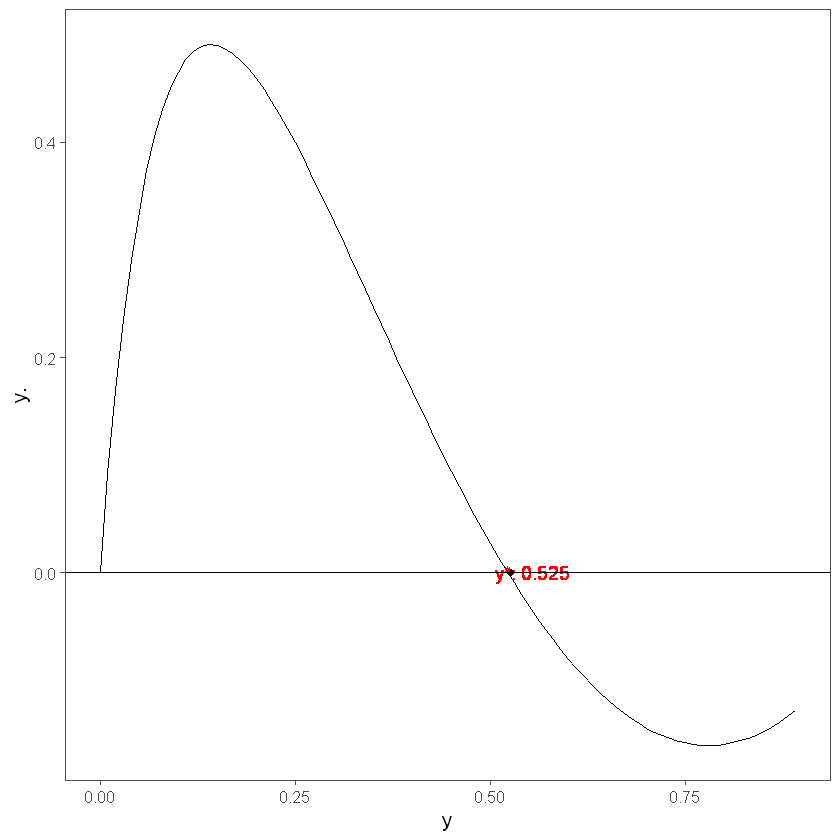

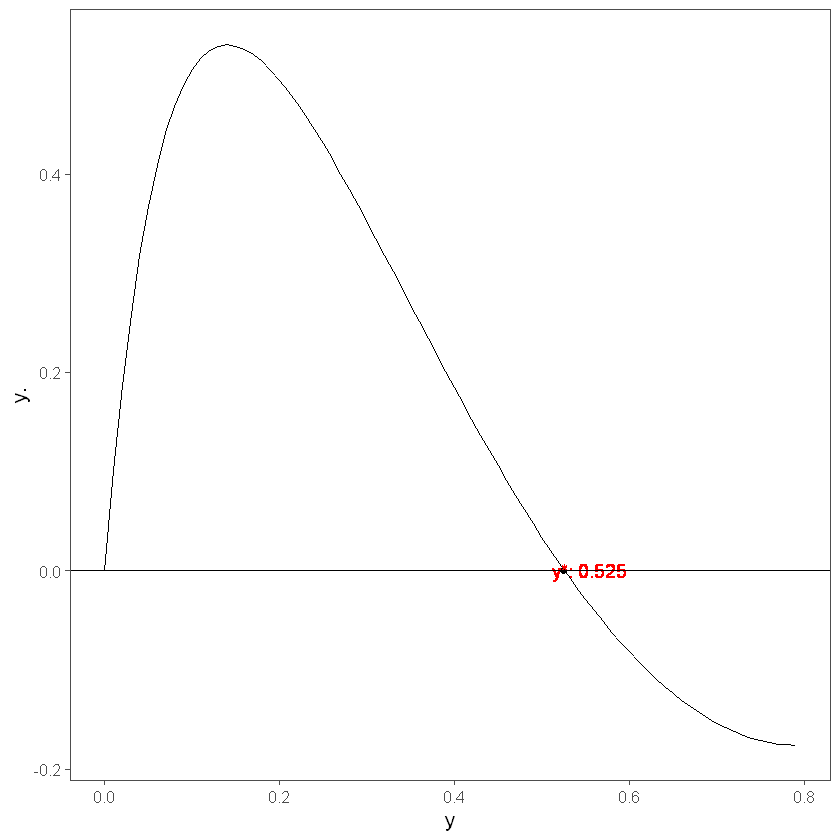

In [5]:
data<-data.frame()
for(y in seq(0,1,0.01)){
  for(x in seq(0,1-y,0.01)){
    temp<-duplicate_dynamic_xy(y,x,M=100,beta1=4,beta2=2,d=4,N=50,c=1,l=0.5)
    data<-rbind(data,temp)
  }
}

#----------------------------------------------#
#-----1.1当躺平人数一定时，内卷人数的稳定点-----#
#----------------------------------------------#
#当x=0.1时
df<-data %>% 
  subset(x==0.1)%>% 
  mutate(y1=c(y.[-1],1)) %>% 
  mutate(y0=y*y1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

ystar<-ifelse(sum(df$y[df$y0<0])==0,0,df$y[df$y0<0]+0.005)

ggplot(df,aes(x=y,y=y.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=ystar,y=0))+
  geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "y", y = "y.")


#当x=0.2时
df<-data %>% 
  subset(x==0.2)%>% 
  mutate(y1=c(y.[-1],1)) %>% 
  mutate(y0=y*y1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

ystar<-ifelse(sum(df$y[df$y0<0])==0,0,df$y[df$y0<0]+0.005)

ggplot(df,aes(x=y,y=y.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=ystar,y=0))+
  geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "y", y = "y.")

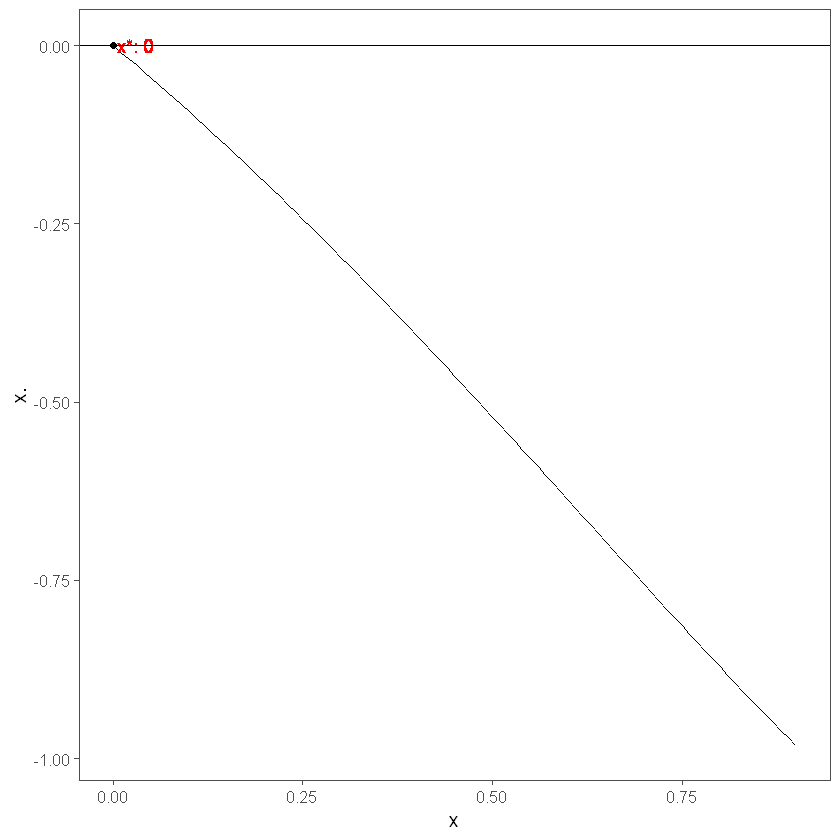

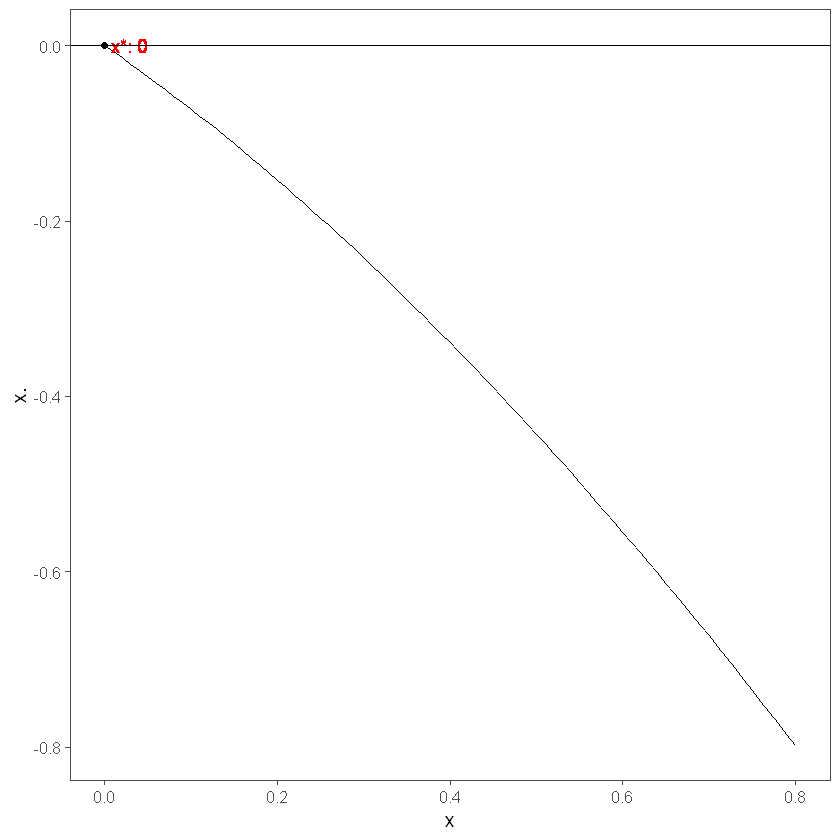

In [6]:
#----------------------------------------------#
#--------1.2内卷人数比例对躺平人数的影响--------#
#----------------------------------------------#
#当y=0.1时
df<-data %>% 
  subset(y==0.1)%>% 
  mutate(x1=c(x.[-1],0)) %>% 
  mutate(x0=x.*x1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

xstar<-ifelse(sum(df$x[df$x0<0])==0,0,df$x[df$x0<0]+0.005)

ggplot(df,aes(x=x,y=x.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=xstar,y=0))+
  geom_text(aes(x=xstar,y=0),label=paste("x*:",xstar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "x", y = "x.")

#当y=0.7时
df<-data %>% 
  subset(y==0.2)%>% 
  mutate(x1=c(x.[-1],0)) %>% 
  mutate(x0=x.*x1)#通过前一项与后一项相乘是否小于0，来获取临界点ystar

xstar<-ifelse(sum(df$x[df$x0<0])==0,0,df$x[df$x0<0]+0.005)

ggplot(df,aes(x=x,y=x.))+
  geom_line(color="black",size=0.3)+
  theme_few() +
  geom_point(aes(x=xstar,y=0))+
  geom_text(aes(x=xstar,y=0),label=paste("x*:",xstar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
  geom_hline(aes(yintercept = 0),size=0.3)+
  labs(x = "x", y = "x.")

#内卷比例看不出来影响躺平

In [49]:
df = data.frame()
for (y in seq(0.01,0.99,0.01)){
    for (x in seq(0.01,0.99,0.01)){
        if (x>=1-y){
            df=rbind(df,data.frame(y=y,x=x,y.=NaN,x.=NaN))
        }
        else{
            df=rbind(df,duplicate_dynamic_xy(y,x,M=100,beta1=1,beta2=1,d=4,N=50,c=1,l=0.5))  
        }
    }
}

In [43]:
df

y,x,y.,x.
<dbl>,<dbl>,<dbl>,<dbl>
0.01,0.01,0.08425687,-0.009933005
0.01,0.02,0.08505385,-0.019895633
0.01,0.03,0.08586159,-0.029886325
0.01,0.04,0.08668030,-0.039903477
0.01,0.05,0.08751020,-0.049945438
0.01,0.06,0.08835149,-0.060010504
0.01,0.07,0.08920440,-0.070096921
0.01,0.08,0.09006916,-0.080202882
0.01,0.09,0.09094600,-0.090326521


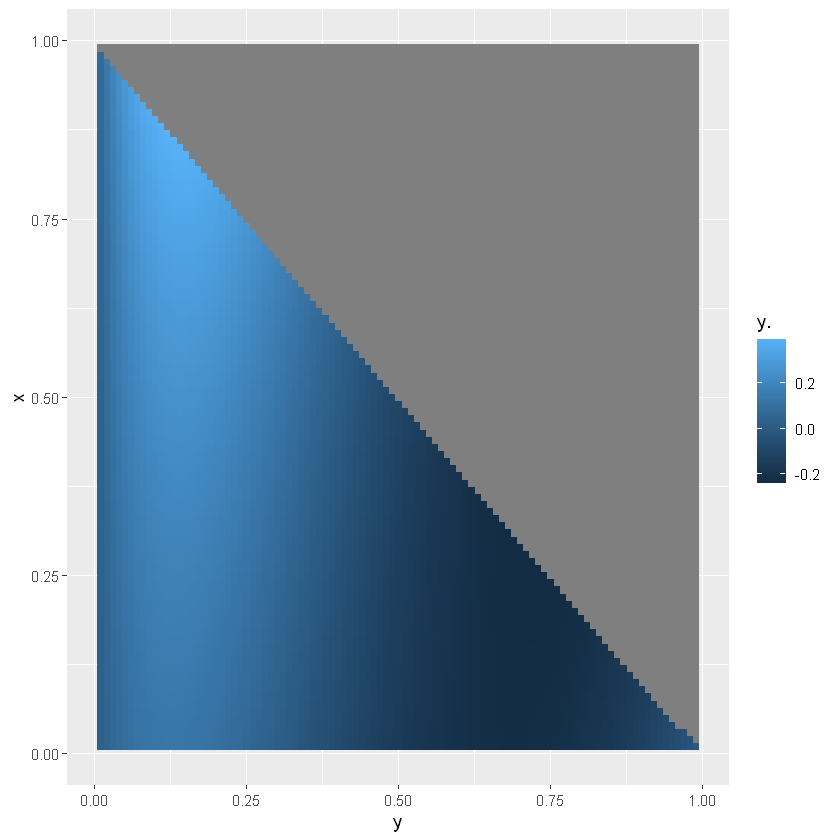

In [50]:
ggplot(df,aes(y,x))+
  geom_raster(aes(fill = y.))

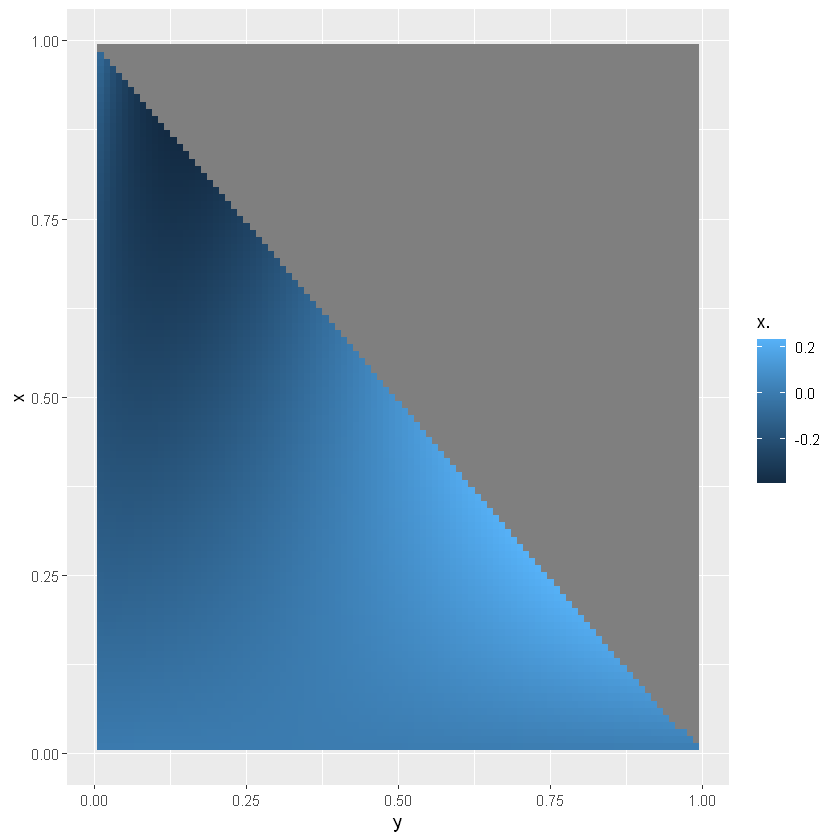

In [51]:
ggplot(df,aes(y,x))+
  geom_raster(aes(fill = x.))

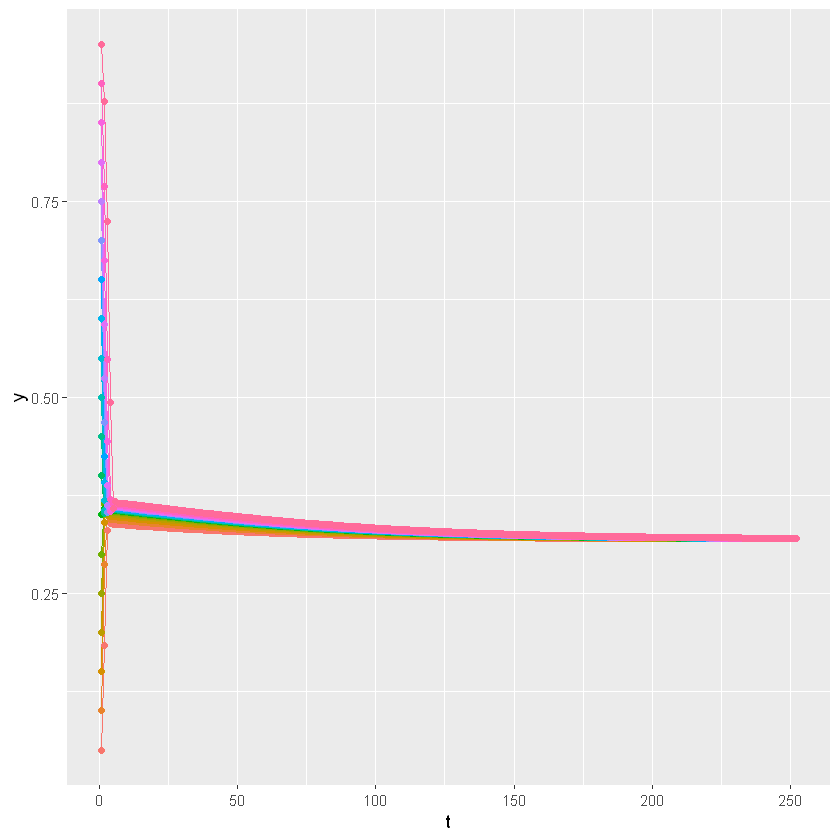

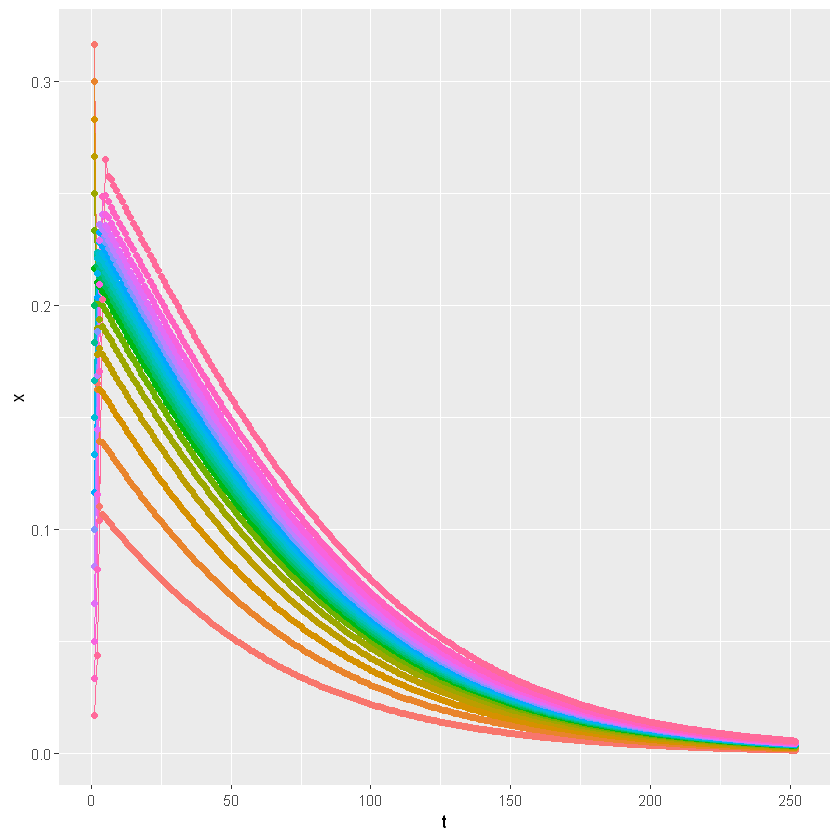

In [68]:
    M =100
    steps = 5000
    endings = c()
    df = data.frame()
    gp = ggplot(x = seq(1,steps+1,1))
    beta1 = 1
    beta2 = 1
    d = 4
    N = 50
    c = 1
    l = 0.5
    # 找到要跑多少步
    for (starting in seq(0.05,0.95,0.05)){
        t = seq(1,steps,1)
        y = c(starting)
        x = c((1-starting)/3)
        
        for (i in t){
            temp = duplicate_dynamic_xy(y[length(y)],x[length(x)],M,beta1,beta2,d,N,c,l)
            y. = temp$y.
            x. = temp$x.
#             cat(temp,ending="\n")
            if (abs(y.) <0.0001 & abs(x.)<0.0001){
                endings = c(endings,i)
                break
            }
            y = c(y,y. + y[length(y)])
            x = c(x,x. + x[length(x)])
        }
    }
    ending = max(endings)

    # 按最大步数再跑一遍
    for (starting in seq(0.05,0.95,0.05)){
        t = seq(1,ending,1)
        y = c(starting)
        x = c((1-starting)/3)
        for (i in t){
            temp = duplicate_dynamic_xy(y[length(y)],x[length(x)],M,beta1,beta2,d,N,c,l)
            y. = temp$y.
            x. = temp$x.
            y = c(y,y.  + y[length(y)])
            x = c(x,x. + x[length(x)])
        }
#         cat(rep(as.character(starting),length(y)),end="\n")
#         cat(endings,end="\n")
#         cat(x,end="\n")
#         cat(y,end="\n")
        df = rbind(df,data.frame(label=rep(as.character(starting),length(y)),t=seq(1,ending+1,1),y=y,x=x))
    }
    ggplot(df,aes(x=t,y=y,color=label))+
        geom_line()+
        geom_point()+
        theme(legend.position="none")
    ggplot(df,aes(x=t,y=x,color=label))+
    geom_line()+
    geom_point()+
    theme(legend.position="none")